In [13]:

import cv2 
import os 
from scipy import stats as s
import numpy as np
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
  



In [14]:
vid='vid1'

In [15]:
path='data/videos/' + vid + '.mp4'
path1 ='data/' +  vid
cam = cv2.VideoCapture(path) 
  

currentframe = 0
  
while(True): 

    ret,frame = cam.read() 
  
    if ret: 
        name = path1 + '/image' + str(currentframe) + '.jpg'
        print ('Creating...' + name) 
        cv2.imwrite(name, frame) 

        currentframe += 1
    else: 
        break

Creating...data/vid1/image0.jpg
Creating...data/vid1/image1.jpg
Creating...data/vid1/image2.jpg
Creating...data/vid1/image3.jpg
Creating...data/vid1/image4.jpg
Creating...data/vid1/image5.jpg
Creating...data/vid1/image6.jpg
Creating...data/vid1/image7.jpg
Creating...data/vid1/image8.jpg
Creating...data/vid1/image9.jpg
Creating...data/vid1/image10.jpg
Creating...data/vid1/image11.jpg
Creating...data/vid1/image12.jpg
Creating...data/vid1/image13.jpg
Creating...data/vid1/image14.jpg
Creating...data/vid1/image15.jpg
Creating...data/vid1/image16.jpg
Creating...data/vid1/image17.jpg
Creating...data/vid1/image18.jpg
Creating...data/vid1/image19.jpg
Creating...data/vid1/image20.jpg
Creating...data/vid1/image21.jpg
Creating...data/vid1/image22.jpg
Creating...data/vid1/image23.jpg
Creating...data/vid1/image24.jpg
Creating...data/vid1/image25.jpg
Creating...data/vid1/image26.jpg
Creating...data/vid1/image27.jpg
Creating...data/vid1/image28.jpg
Creating...data/vid1/image29.jpg
Creating...data/vid1

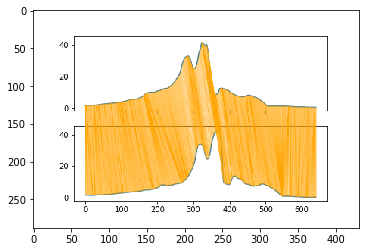

In [16]:
#https://dtaidistance.readthedocs.io/en/latest/usage/dtw.html#

path1 ='data/' + vid + '/image' +str(4) +'.jpg'
path2 ='data/' + vid + '/image' +str(7) +'.jpg'
image_A = cv2.imread(path1,0)
image_B = cv2.imread(path2,0)
      
s1 =np.mean(image_A,axis=0)
s2 =np.mean(image_B,axis=0)
#s1 = np.array([0., 0, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0])
#s2 = np.array([0., 1, 2, 3, 1, 0, 0, 0, 2, 1, 0, 0, 0])
path = dtw.warping_path(s1, s2)
dtwvis.plot_warping(s1, s2, path, filename="warp.png")
img = mpimg.imread('warp.png')
imgplot = plt.imshow(img)

(<Figure size 720x720 with 4 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x256f50ea320>])

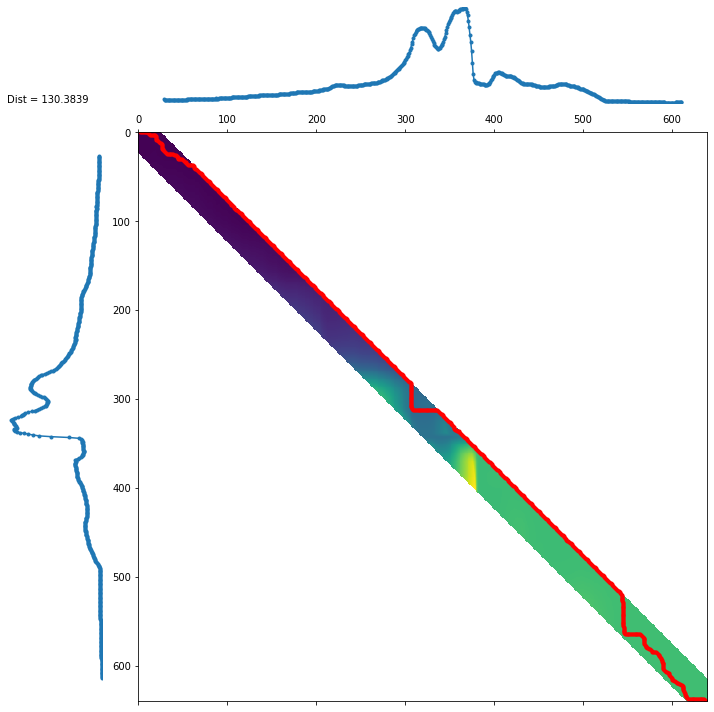

In [17]:
d, paths = dtw.warping_paths(s1, s2, window=25, psi=2)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(s1, s2, paths, best_path)

In [18]:
path='data/' + vid
count =0
for image in os.listdir(path):
  count =count+1
print(count)

154


In [19]:
def calc_GMV(image_A,image_B,A):
    #Calculating Mean along axis
    #if axis =0 then Sh is calculated
    #if axis =1 then Sv is calculated
    arr1 =np.mean(image_A,axis=A)
    arr2 =np.mean(image_B,axis=A)

    #Calculating DS
    for i in range(len(arr1)-1):
        arr1[i]=arr1[i+1]-arr1[i]
        arr2[i]=arr2[i+1]-arr2[i]
        rows, cols = (len(arr1),len(arr2)) 

    #Creating array for DTW Matrix
    arr = [[0] * cols for _ in range(rows)]

    # Dynamic time warping
    for i in range(len(arr1)):
        for j in range(len(arr2)):
            if(i==0 and j==0):
                arr[i][j]=abs(arr1[i]-arr2[j])
            elif(i==0):
                arr[i][j]=abs(arr1[i]-arr2[j])+ arr[i][j-1]
            elif(j==0):
                arr[i][j]=abs(arr1[i]-arr2[j])+ arr[i-1][j]
            else:
                arr[i][j]=abs(arr1[i]-arr2[j]) + min(arr[i][j-1],arr[i-1][j],arr[i-1][j-1])

    #Dual Accumulated Dynamic time warping

    for i in range(len(arr1)):
        for j in range(len(arr2)):
            if(i==0 and j==0):
                continue
            elif(i==0):
                arr[i][j]=arr[i][j]+ arr[i][j-1]
            elif(j==0):
                 arr[i][j]=arr[i][j]+ arr[i-1][j]
            else:
                 arr[i][j]=arr[i][j] + min(arr[i][j-1],arr[i-1][j],arr[i-1][j-1])  

    #PATH

    cur_row=len(arr1)-1
    cur_col=len(arr1)-1
    path=[]
    while(cur_row>=0 and cur_col>=0):
        path.append((cur_row,cur_col))
        if(cur_row==0):
            cur_col=cur_col-1
        elif(cur_col==0):
            cur_row=cur_row-1
        else:
            a=arr[cur_row-1][cur_col]
            b=arr[cur_row][cur_col-1]
            c=arr[cur_row-1][cur_col-1]
            if(a<=b and a<=c):
                cur_row=cur_row-1
            elif (b<=a and b<=c):
                cur_col=cur_col-1
            else:
                cur_row=cur_row-1
                cur_col=cur_col-1

    path.reverse()

    diff=[]
    g=35 #Windows Size as mentioned in the paper
    for x,y in path:
        diff.append(y-x)

    GMV =s.mode(diff[g+1:len(diff)-g])[0]
    return GMV

In [20]:
#Accumulated Global Motion Vector
Frame=[]
AGMV=[]
AGMV.append((0,0))
Frame.append(0)
threshold=20


for i in range(1,count-1):
    print(i)
    path1 ='data/' + vid + '/image' +str(i-1) +'.jpg'
    path2 ='data/' + vid + '/image' +str(i) +'.jpg'
    image1 = cv2.imread(path1,0)
    image2 = cv2.imread(path2,0)
    GMV_Y=calc_GMV(image1,image2,1)
    GMV_X=calc_GMV(image1,image2,0)
    AGMV_curX=GMV_X+AGMV[len(AGMV)-1][0]
    AGMV_curY=GMV_Y+AGMV[len(AGMV)-1][1]
    
    if (abs(AGMV_curX)>=threshold or abs(AGMV_curY)>=threshold ):
      AGMV.append(AGMV[len(AGMV)-1])
      Frame.append(i)

    else :
      AGMV.append((AGMV_curX,AGMV_curY))
      Frame.append(Frame[len(Frame)-1])
    
    
    #print(GMV_X,GMV_Y)
    #print(path1)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152


In [21]:
#Making Video from frames
from os.path import isfile, join
 
frame_array = []
pathOut='output/'+vid+'/project(th=' + str(threshold) + ').avi'
fps=25
for frame in Frame:
  path = 'data/' +vid  +'/image'+str(frame) +'.jpg'
  img = cv2.imread(path)
  height, width, layers = img.shape
  size = (width,height)
  #print(height)
  #inserting the frames into an image array
  frame_array.append(img)

out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

for i in range(len(frame_array)):
  out.write(frame_array[i])
out.release()